# Overview

In this lab, you will learn how to
1. Use **KNeighborsClassifier** method in **scikit-learn (sklearn)** library, and understand the structure of classes in scitkit-learn.
2. Implement **kNN** algorithm from scratch, and practice referring to **API documentations** to write codes.
3. Implement **Bagging** algorithm from scratch.


Let's get started.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: K-Nearest Neighbors from sklearn
[scikit-learn](https://scikit-learn.org/stable/index.html), also known as sklearn, is a free machine learning library for the Python programming language. Using sklearn, you can find various classical and popular machine learning methods such as regression, classification, clustering and so on. 



##### First, let's use the **KNeighborsClassifier** method in sklearn to implement k-nearest neighbors algorithm. 

Let's look at a simple case first. For example, we have the following training dataset. And we want to predict the class label of a future unseen data point.

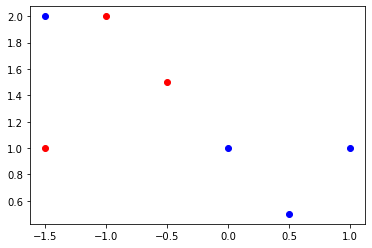

In [2]:
X_train = np.array([[-0.5,  1.5],
                    [-1.5,  1],
                    [ 1,  1],
                    [0.5, 0.5],
                    [ 0,  1],
                    [-1,  2],
                    [-1.5, 2]])
y_train = np.array([1, 1, -1, -1, -1, 1, -1])

# Visualize on 2d plane
plt.scatter(X_train[[0, 1, -2], 0], X_train[[0, 1, -2], 1], c='r') # y=1
plt.scatter(X_train[[2, 3, 4, -1], 0], X_train[[2, 3, 4, -1], 1], c='b') #y=-1

Here is your task. Please refer to the [kNN documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to figure out how to "train" the model using 
`X_train` and `y_train`, and make predictions on `X_test`.

**Remark: It's very common to feel lost when reading the documentation page. But you could directly refer to the "Example" section, where you will find out that it may not be that hard.**

In [3]:
#grade

from sklearn.neighbors import KNeighborsClassifier

def knn(X_train, y_train, X_test, k=3):
    ### START YOUR CODE ###
    neighbors = KNeighborsClassifier(n_neighbors=k)
    neighbors.fit(X_train, y_train)
    preds = neighbors.predict(X_test)

    ### END YOUR CODE ###
    return preds

In [4]:
# Sample Test Case
X_test = np.array([[-1.5, 1.8]])
y_test = np.array([1])
assert np.array_equal(y_test, np.array(knn(X_train, y_train, X_test, k=3)))

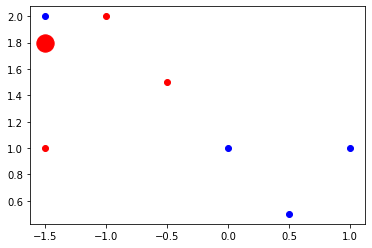

In [6]:
# Visualization for X_test
plt.scatter(X_train[[0, 1, -2], 0], X_train[[0, 1, -2], 1], c='r') # y=1
plt.scatter(X_train[[2, 3, 4, -1], 0], X_train[[2, 3, 4, -1], 1], c='b') #y=-1
plt.scatter(X_test[[0], 0], X_test[[0], 1], c='r', s=300) # y=1

The large point and its color shows our prediction result for this new data point. Because it seems to be in the red cluster, if we set up a reasonable value for k, then its class should be 1 (red color). 

# Task 2: K-Nearest Neighbors from scratch
*You are welcome to simply use machine learning methods from sklearn to apply on real-world data. However, fully understanding the algorithms is very important. Every algorithm may be used in different scenarios and has lots of hyperparameters. A good understanding of the algorithms, helps finetune the parameters when working with real-world data.*

In this section, you'll build a K-Nearest Neigbors classifier **from scratch**, and train it to make predictions on a dataset. 

<!-- An empty KNN class is given to you. You need to implement several functions to build your kNN classifier.  -->

<!-- ## Complete the `euclidean()` method (Delete later) -->
### `euclidean()` method
Recall that in kNN classifier, given a new data point, we need to calculate the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between itself and all the other existing data points. 

This method is given to you, but you are welcome to look into details how this function is implemented. You will use this function later.

<!-- The inputs for this function should be 2 vectors of shape `(d,1)`. Your job is to return the euclidean distance between these two inputs. -->

<!-- ***hint**:   -->
refer to: [`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), [`np.square`](https://numpy.org/doc/stable/reference/generated/numpy.square.html), [`np.sqrt`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

In [7]:
def euclidean(v1, v2):
    return np.sqrt(np.sum(np.square(v1 - v2)))

## Helper functions

Next, you will write three helper functions to make things easier when completing the `knn_predict()` method. 

### **(1)** In the cell below, complete the `get_distances()` function. This function should:

* Take in two arguments: `X_train` and `x`
* Create an empty array, `distances`, to hold all the distances you're going to calculate
* Enumerate through every item in `X_train`. For each item: 
    * Use the `euclidean()` function to get the distance between x and the current point from `X_train` 
    * `append` each distance it to the `distances` array. `append` is a method for adding elements at the end of an array. If you are not familiar with it, you can refer to: [`append`](https://www.w3schools.com/python/ref_list_append.asp)
* Return the `distances` array when a distance has been generated for all items in `X_train` 

In [8]:
#grade

def get_distances(X_train, x):
    distances = []
    
    for i in range(X_train.shape[0]):
        ### START YOUR CODE ###
        distances.append(euclidean(X_train[i], x))

        ### END YOUR CODE ###
    return distances

In [9]:
# Sample Test Case
X_train = np.array([[-0.5,1.5],[-1.5, 1],[1, 1],
                    [0.5, 0.5],[ 0, 1],[-1,2],[-1.5, 2]])
x = np.array([[-1.5, 1.8]])
ans = np.array([1.04, 0.8, 2.62, 2.39, 1.7, 0.54, 0.20])
assert np.array_equal(np.round(abs(ans - get_distances(X_train, x))), np.zeros([7]))

### **(2)** Well done! You will now create a `get_k_nearest()` function to retrieve indices of the k-nearest points. This function should:

* Take two arguments:
    * `dists`: an array of distances, which will be output from the `get_distances()` method. 
    * `k`: the number of nearest neighbors you want to return
* Sort the `dists` array by distances values, and return the indices of the first `k` data points from the sorted array. This can be done using a single function in numpy: [`np.argpartition`](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html)

<!-- **_Hint:_** To easily sort on the second item in the tuples contained within the `dists` array, use the [`sorted()`](https://www.w3schools.com/python/ref_func_sorted.asp) function and pass in lambda for the `key=` parameter. To sort on the second element of each tuple, you can just use `key=lambda x: x[1]`. -->

In [19]:
#grade

def get_k_nearest(dists, k):
    
    ### START YOUR CODE ###
    return np.argpartition(dists, k)[:k]#np.sort(dists)[:k]
    

    ### END YOUR CODE ###

In [20]:
# Sample Test Case
t_dists = np.array([3.7, 2.9, 10.4, 0.1, 5.2, 3.1])
ans = np.array([3, 1, 5])
kn = get_k_nearest(t_dists, k=3)
print(kn)
assert np.array_equal(sorted(ans), sorted(kn))

[3 5 1]


### **(3)** The final helper function you'll create will get the labels that correspond to each of the k-nearest point, and return the class that occurs the most. 

Complete the `get_label_prediction()` function in the cell below. This function should:

* Create a list containing the labels from `y_train` for each index in `k_nearest` (remember, each item in `k_nearest` is an index)
* Get the total counts for each label (use [`np.bincount()`](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) and pass in the label array created in the previous step)
* Get the index of the label with the highest overall count in counts (use [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) for this, and pass in the counts created in the previous step) 

In [52]:
#grade

def get_label_prediction(y_train, k_nearest_indices):
    
    ### START YOUR CODE ###
    labels = y_train[k_nearest_indices]
    counts = np.bincount(labels)
    label = np.argmax(counts)
    
    return label

    ### END YOUR CODE ###

In [53]:
# Sample Test Case
y_train = np.array([1, 1, 0, 0, 0, 0, 3, 3, 3, 0])
kn = [3, 6, 5]
ans = 0
get_label_prediction(y_train, kn)
assert get_label_prediction(y_train, kn) == ans

Great! Now, you now have all the ingredients needed to complete the `predict()` method.

## Complete the `predict()` method

Here's an outline of how this method should work:

* Our `predict` function should take in four arguments:
    * `X_train`: the training data
    * `y_train`: the training labels
    * `X_test`: the points we want to classify
    * `k`: which specifies the number of neighbors we should use to make the classification.
* Your method will need to iterate through every item in `X_test`. For each item:
    * Calculate the distance to all points in `X_train` by using the `get_distances()` helper method 
    * Find the k-nearest points in `X_train` by using the `get_k_nearest()` method 
    * Use the index values contained within the tuples returned by `get_k_nearest()` method to get the corresponding labels for each of the nearest points  
    * Determine which class is most represented in these labels and treat that as the prediction for this point. Append the prediction to `preds` 
* Once a prediction has been generated for every item in `X_test`, return `preds`

Follow these instructions to complete the `predict()` method in the cell below: 

In [54]:
#grade

def knn_predict(X_train, y_train, X_test, k=3):
    preds = []
    for x in X_test:
        # Think about how to use all the helper functions we defined before
        ### START YOUR CODE ###
        
        dists = get_distances(X_train, x)
        knearest = get_k_nearest(dists,k)
        pred = get_label_prediction(y_train, knearest)
        preds.append(pred)
        
        
        ### END YOUR CODE ###
    return preds

Great! Now, try out your new KNN classifier on a sample dataset to see how well it works!

## Test the KNN classifier


### [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) 
consists of 50 samples from each of three species of Iris (**Iris setosa, Iris virginica and Iris versicolor**). Four features were measured from each sample: **the length and the width of the sepals and petals**, in centimeters. Based on the combination of these four features, we could try a lot of classification methods to distinguish the species from each other.
<!-- 
Note that there are **_3 classes_** in the Iris dataset, making this a multi-categorical classification problem. This means that you can't use evaluation metrics that are meant for binary classification problems. For this, just stick to accuracy for now.  -->

#### First, we use [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) to load the dataset from `sklearn.datasets`.

In [55]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris['data']
target = iris['target']

Next, we use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in `sklearn.model_selection` to create train and test splits for the dataset.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

Let's have a look at what are really in `X_train` and `y_train`.

In [57]:
X_train, y_train

(array([[5. , 3.6, 1.4, 0.2],
        [5.2, 4.1, 1.5, 0.1],
        [5.8, 2.7, 5.1, 1.9],
        [6. , 3.4, 4.5, 1.6],
        [6.7, 3.1, 4.7, 1.5],
        [5.4, 3.9, 1.3, 0.4],
        [5.4, 3.7, 1.5, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [6.3, 2.8, 5.1, 1.5],
        [6.4, 3.1, 5.5, 1.8],
        [6.6, 3. , 4.4, 1.4],
        [7.2, 3.6, 6.1, 2.5],
        [5.7, 2.9, 4.2, 1.3],
        [7.6, 3. , 6.6, 2.1],
        [5.6, 3. , 4.5, 1.5],
        [5.1, 3.5, 1.4, 0.2],
        [7.7, 2.8, 6.7, 2. ],
        [5.8, 2.7, 4.1, 1. ],
        [5.2, 3.4, 1.4, 0.2],
        [5. , 3.5, 1.3, 0.3],
        [5.1, 3.8, 1.9, 0.4],
        [5. , 2. , 3.5, 1. ],
        [6.3, 2.7, 4.9, 1.8],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [5.6, 2.7, 4.2, 1.3],
        [5.1, 3.4, 1.5, 0.2],
        [5.7, 3. , 4.2, 1.2],
        [7.7, 3.8, 6.7, 2.2],
        [4.6, 3.2, 1.4, 0.2],
        [6.2, 2.9, 4.3, 1.3],
        [5.7, 2.5, 5. , 2. ],
        [5

Let's see how well your kNN classifier does.

In [58]:
# Sample Test Case (Not exactly testing, but we have hiddent test for this)
from sklearn.metrics import accuracy_score
preds = knn_predict(X_train, y_train, X_test, k=3)

print("Testing Accuracy (from scratch): {}%".format(100*accuracy_score(y_test, preds)))

Testing Accuracy (from scratch): 100.0%


If your testing accuracy is pretty high, then you probably have successfully implemented a correct kNN algorithm. Congratulations!



That was great! Next, you'll dive a little deeper into the KNN algorithm!

### Now, let's test on the [hand-written digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
data = digits['data']
target = digits['target']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)

(1347, 64) (1347,)


Try different values for k, **find a k with the highest testing accuracy**. 

In [60]:

k = 6 # Please set different values for k to find the value with the highest testing accuracy.


preds_knc = knn_predict(X_train, y_train, X_test, k=k)
print("Test Accuracy:", accuracy_score(y_test, preds_knc))

Test Accuracy: 0.9955555555555555


You could try to output a line plot, where the **x-axis** is the value of **k**, and the **y-axis** is the **testing accuracy**. This part will not be graded, but it will help you determine the value of k. You can refer to [plt.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

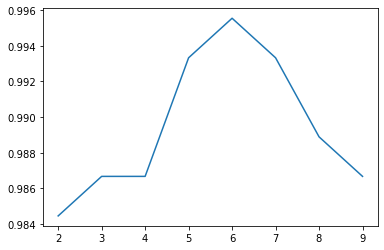

In [61]:
# This is not graded. Extra code only to help you find the highest k
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

### START YOUR CODE ###

x_axis = [] # the value of k's
y_axis = [] # testing accuracy

for k in range(2, 10):
    
    kpreds = knn_predict(X_train, y_train, X_test, k = k)
    x_axis.append(k)
    y_axis.append(accuracy_score(y_test,kpreds))

### END YOUR CODE ###
plt.plot(x_axis, y_axis)

What is the value of `k` that gives the highest test accuracy? Replace `None` below by the value that you found. **This next cell will be graded!!**

In [62]:
#grade

k = 6

# Task 3: Bagging (Bootstrap Aggregate)
Remember that decision tree is a function $f:\mathbb{X}→\mathbb{Y}$, represented by a binary tree in which:
* Each **tree node** is associated with a splitting rule $g : \mathbb{X} → \{0, 1\}$.
* Each **leaf node** is associated with a label $y \in \mathbb{Y}$.
For example,<br>

<img src="https://drive.google.com/uc?id=1-otgbIhQ7flzWij2ANmrflVB2sbOzFYa" width="500">

### A one-level decision class is given to you. You will need to use this class later.

`Stump` is a class that constructs a decision tree with one internal node. To construct such a tree for a training set we need to call `Stump(data, labels, weights)` where
- `data` is a `(n,d)` matrix where each example has `d` features and there are `n` examples in the training set
- `labels` is `(n, )` array where the $i$th entry is the label of the $i$th example in `data`
- `weights` is `(n, )` array. The label of a leaf is the weighted sum of the labels in the training set. `weights` provides the weight for each example. In this example we will use `weights` to have equal entries.

In [63]:
class Stump():
    def __init__(self, data, labels, weights):
        '''
        Initializes a stump (one-level decision tree) which minimizes
        a weighted error function of the input dataset.

        In this function, you will need to learn a stump using the weighted
        datapoints. Each datapoint has 2 features, whose values are bounded in
        [-1.0, 1.0]. Each datapoint has a label in {+1, -1}, and its importance
        is weighted by a positive value.

        The stump will choose one of the features, and pick the best threshold
        in that dimension, so that the weighted error is minimized.

        Arguments:
            data: An ndarray with shape (n, 2). Values in [-1.0, 1.0].
            labels: An ndarray with shape (n, ). Values are +1 or -1.
            weights: An ndarray with shape (n, ). The weights of each
                datapoint, all positive.
        '''
        dimension = {0, 1}
        sign = {-1, 1}
        self.min_loss = float('inf')

        self.arg_min_loss_dimension = float('inf')
        self.arg_min_loss_threshold = float('inf')
        self.arg_min_loss_sign = float('inf')

        for d in dimension:
            data_sort_by_d = data[data[:, d].argsort()]
            threshold = [-1.0, 1.0]
            for i in range(len(data_sort_by_d) - 1):
                threshold.append((data_sort_by_d[i, d] + data_sort_by_d[i + 1, d]) / 2)
            threshold = np.unique(threshold)
            for t in threshold:
                for s in sign:
                    labels_hat = []
                    for j in data:
                        if j[d] >= t:
                            labels_hat.append(s)
                        else:
                            labels_hat.append(-s)
                    labels_hat = np.array(labels_hat)
                    loss = np.dot(weights, np.abs(labels_hat - labels) / 2)
                    if loss < self.min_loss:
                        self.min_loss = loss
                        self.arg_min_loss_dimension = d
                        self.arg_min_loss_threshold = t
                        self.arg_min_loss_sign = s


    def predict(self, data):
        '''
        Predicts labels of given datapoints.

        Arguments:
            data: An ndarray with shape (n, 2). Values in [-1.0, 1.0].

        Returns:
            prediction: An ndarray with shape (n, ). Values are +1 or -1.
        '''
        # print(self.arg_min_loss_sign, self.arg_min_loss_threshold, self.arg_min_loss_dimension, self.min_loss)
        result = []
        for d in data:
            if d[self.arg_min_loss_dimension] >= self.arg_min_loss_threshold:
                result.append(self.arg_min_loss_sign)
            else:
                result.append(-self.arg_min_loss_sign)
        return np.array(result)

### Bagging = Bootstrap aggregating (Leo Breiman, 1994)

Random forest is one kind of [Bagging Algorithm](https://en.wikipedia.org/wiki/Bootstrap_aggregating#Algorithm_(classification)). The only difference between the Bagging we need to implement here and the random forest algorithm we talked in class is that when using the decision tree classifier, bagging simply use all the features but random forest will sample $\sqrt{d}$ features from all the $d$ features.

Now, your job is to use the `Stump` (1-level Decision Tree) class to implement the bagging algorithm. You can refer to the pseudocode below: (ignore the variable notations below, only refer to the steps of the algorithm)

<br>
<img src="https://drive.google.com/uc?id=1al1Uj5bohgzrXZ8hOlibaWwDozn1hFX6" width="500"/>

**Remark**: Refer to [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)


In [77]:
#grade

def bagging(data, labels, n_classifiers, n_samples, seed=0):
    '''
    Runs Bagging algorithm.

    Arguments:
        data: An ndarray with shape (n, 2). Values in [-1.0, 1.0].
        labels: An ndarray with shape (n, ). Values are +1 or -1.
        n_classifiers: Number of classifiers to construct.
        n_samples: Number of samples to train each classifier.
        seed: Random seed for NumPy.

    Returns:
        classifiers: A list of classifiers.
    '''
    classifiers = []
    n = data.shape[0]
    data_weights = np.ones(n) / n
    for i in range(n_classifiers):
        np.random.seed(seed + i)
        '''
        IMPORTANT:
          1. You only need to instantiate a list of different classifiers and collect them together.
             We will help you run the classifiers and do the majority vote in the visualization function.
          2. To instantiate a new one-level decision tree, please use the Stump class, 
             and pass your sampled data, labels and the data_weights to it.
        '''
        ### START YOUR CODE HERE ###
        subset = np.random.choice(np.arange(0,n), n_samples)
        data_subset = data[subset]
        labels_subset = labels[subset]
        weights_subset = data_weights[subset]
        classifier = Stump(data_subset, labels_subset, weights_subset)
        
        classifiers.append(classifier)
        
        

        ### END YOUR CODE ###

    return classifiers

In [78]:
def visualization(data, labels, classifiers, weights=None, plot=True):
    '''
    Visualizes a dataset and the ensemble's predictions in 2D space.

    Arguments:
        data: An ndarray with shape (n, 2). Values in [-1.0, 1.0].
        labels: An ndarray with shape (n, ). Values are +1 or -1.
        classifiers: A list of classifiers.
        weights: A list of weights assigned to the classifiers.
            If None, weights will be equal for all classifiers.
    '''
    if weights is None:
        weights = [1.0] * labels.size

    # Aggregate predicions from weighted classifiers
    pred = np.zeros(labels.shape)
    for s, w in zip(classifiers, weights):
        pred += w * s.predict(data)

    # Break ties if any
    pred = np.sign(np.sign(pred) + 1e-6)

    # Count mis-classified datapoints
    count = (pred != labels).sum()
    if plot:
        print('{} points mis-classified'.format(count))

    # Plot
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        axes[0].set_title('Ground truth')
        axes[0].plot(data[labels == 1, 0], data[labels == 1, 1], 'rx')
        axes[0].plot(data[labels == -1, 0], data[labels == -1, 1], 'bo')
        axes[0].set_xlim(-1, 1)
        axes[0].set_ylim(-1, 1)
        axes[1].set_title('Prediction')
        axes[1].plot(data[pred == 1, 0], data[pred == 1, 1], 'rx')
        axes[1].plot(data[pred == -1, 0], data[pred == -1, 1], 'bo')
        axes[1].set_xlim(-1, 1)
        axes[1].set_ylim(-1, 1)
        plt.show()
    return pred

5 points mis-classified


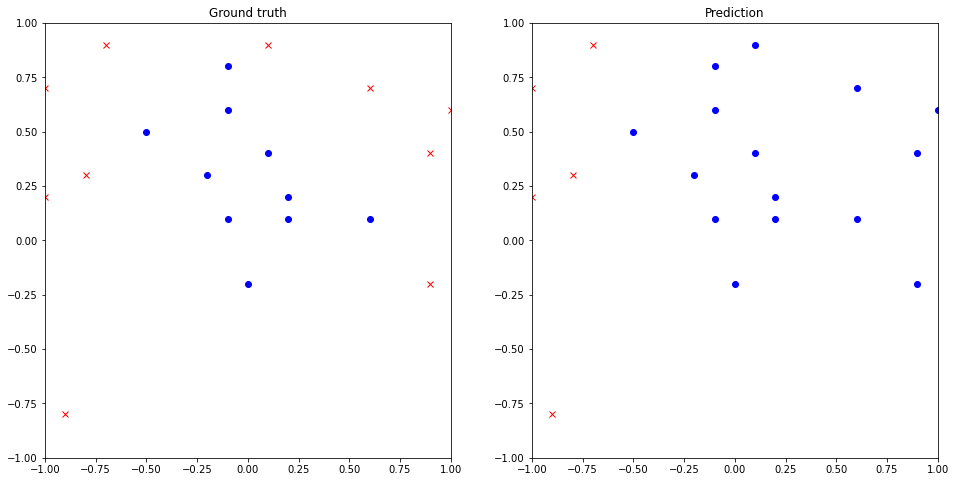

In [79]:
# Sample Test Case
def get_dataset_fixed():
    '''
    Returns a simple dataset with pre-defined datapoints.

    Returns:
        data: An ndarray with shape (20, 2). Values in [-1.0, 1.0].
        labels: An ndarray with shape (20, ). Values are +1 or -1.
    '''
    data = np.array([[ 0.1,  0.4],[ 0.2,  0.1],[-0.2,  0.3],[-0.1,  0.8],
                     [ 0.9, -0.2],[ 0.6,  0.1],[ 0.1,  0.9],[-0.9, -0.8],
                     [-1. ,  0.7],[ 0.6,  0.7],[ 1. ,  0.6],[-0.1,  0.6],
                     [-0.8,  0.3],[-0.7,  0.9],[ 0. , -0.2],[-0.5,  0.5],
                     [-0.1,  0.1],[-1. ,  0.2],[ 0.2,  0.2],[ 0.9,  0.4]])
    labels = np.array([-1., -1., -1., -1.,  1.,
                       -1.,  1.,  1.,  1.,  1.,
                        1., -1.,  1.,  1., -1.,
                       -1., -1.,  1., -1.,  1.])
    return data, labels

ans = np.array([-1, -1, -1, -1, -1, 
                -1, -1,  1,  1, -1,
                -1, -1,  1,  1, -1,
                -1, -1,  1, -1, -1,])

np.random.seed(1234)
train_data, train_labels = get_dataset_fixed()
bagging_classifiers = bagging(train_data, train_labels, 20, 10) # Don't change this parameter at this moment
pred = visualization(train_data, train_labels, bagging_classifiers)
# 5 points will be mis-classified
assert np.array_equal(ans, pred)

### Next, play with your bagging algorithm by setting different parameters (number of decision tree classifiers and number of samples for each classifier)

Set values for `num_classifiers` and `num_samples` so that you get fewer than 5 errors.

2 points mis-classified


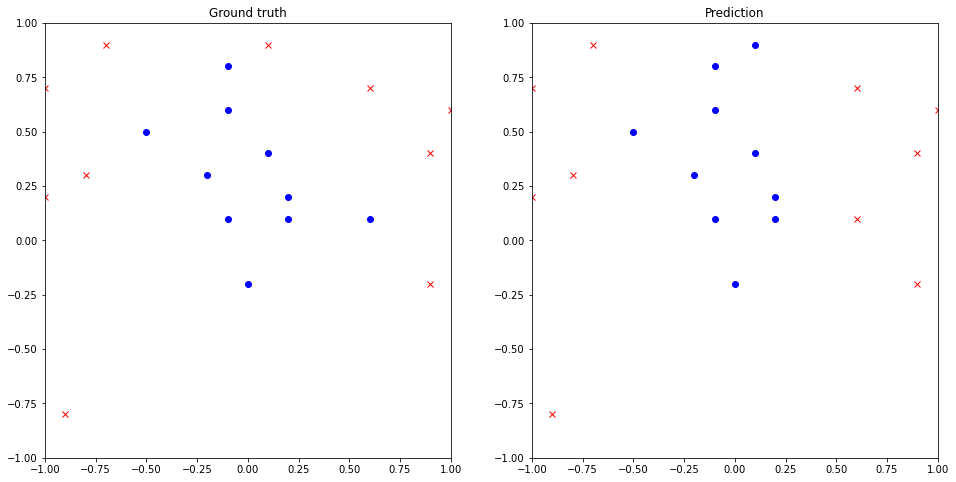

In [88]:

np.random.seed(1234)
num_classifiers = 6
num_samples = 10

train_data, train_labels = get_dataset_fixed()
bagging_classifiers = bagging(train_data, train_labels, num_classifiers, num_samples) 
pred = visualization(train_data, train_labels, bagging_classifiers)

# Test Case
count = (pred != train_labels).sum()
assert count < 5